In [1]:
import pandas as pd
from numpy import *
import numpy as np
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import neighbors

In [2]:
data =pd.read_csv('train dataset.csv')
array = data.values

In [4]:
for i in range(len(array)):
	if array[i][0]=="Male":
		array[i][0]=1
	else:
		array[i][0]=0


In [5]:
df=pd.DataFrame(array)

In [6]:
maindf =df[[0,1,2,3,4,5,6]]
mainarray=maindf.values
print (mainarray)

[[0 17 7 ... 7 3 2]
 [0 19 4 ... 4 6 6]
 [0 18 7 ... 4 5 5]
 ...
 [0 22 5 ... 3 6 1]
 [0 19 5 ... 5 7 5]
 [0 18 5 ... 7 6 5]]


In [7]:
temp=df[7]
train_y =temp.values
# print(train_y)
# print(mainarray)
train_y=temp.values

In [8]:
for i in range(len(train_y)):
	train_y[i] =str(train_y[i])

In [9]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
mul_lr.fit(mainarray, train_y)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [10]:
testdata =pd.read_csv('test dataset.csv')
test = testdata.values

In [11]:
data.shape

(709, 8)

In [12]:
testdata.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,20.244444,4.850794,4.584127,4.812698,4.844444,4.926984
std,2.616811,1.537211,1.818623,1.786315,1.718555,1.466527
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,3.000000,4.000000,4.000000,4.000000
50%,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,22.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [13]:
testdata.shape

(315, 8)

In [14]:
for i in range(len(test)):
	if test[i][0]=="Male":
		test[i][0]=1
	else:
		test[i][0]=0

In [15]:
df1=pd.DataFrame(test)

In [16]:
testdf =df1[[0,1,2,3,4,5,6]]
maintestarray=testdf.values
print(maintestarray)

[[0 20 7 ... 9 5 5]
 [1 17 5 ... 5 2 4]
 [0 25 5 ... 7 2 4]
 ...
 [1 18 7 ... 6 2 7]
 [1 23 6 ... 5 4 3]
 [0 18 5 ... 3 5 6]]


In [17]:
y_pred = mul_lr.predict(maintestarray)
for i in range(len(y_pred)) :
	y_pred[i]=str((y_pred[i]))
DF = pd.DataFrame(y_pred,columns=['Predicted-Personality'])
DF.index=DF.index+1
DF.index.names = ['Person-No']
DF.to_csv("out.csv")

In [18]:
output=pd.read_csv('out.csv')
output

,Person-No,Predicted-Personality
0,1,dependable
1,2,responsible
2,3,serious
3,4,serious
4,5,responsible
...,...,...
310,311,lively
311,312,serious
312,313,dependable
313,314,extraverted


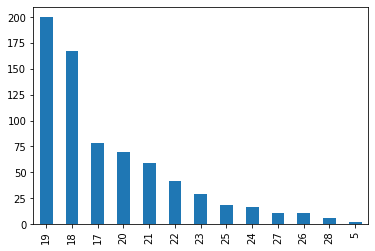

In [19]:
data.Age.value_counts().plot.bar()

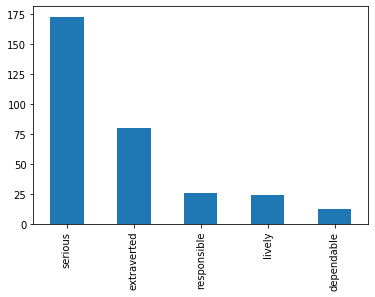

In [20]:
output["Predicted-Personality"].value_counts().plot.bar()